#### Essential packages require to strat the work on Logistic regression and Decision Tree

In [193]:
import pandas as pd
import numpy as np
import graphviz 
import re
import nltk 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

#### Reading dataset method

In [194]:
gme_data = pd.read_csv('GME_augmented_processed.csv')
gme_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,LMA,ADX,up,Score,Sentiment
0,2021-02-17,49.770000,51.189999,44.560001,45.939999,45.939999,9186800.0,45.962590,110.887913,78.886475,26.642816,0,-0.173827,-1
1,2021-02-17,49.752222,51.157777,44.505695,45.867082,45.867082,9186800.0,45.953698,110.590784,78.899723,26.625878,0,-0.173827,-1
2,2021-02-17,49.734445,51.125555,44.451390,45.794166,45.794166,9186800.0,45.944800,110.295705,78.912937,26.608974,0,-0.173827,-1
3,2021-02-17,49.716667,51.093332,44.397084,45.721249,45.721249,9186800.0,45.935898,110.002673,78.926115,26.592103,0,-0.173827,-1
4,2021-02-17,49.698889,51.061110,44.342779,45.648332,45.648332,9186800.0,45.926990,109.711690,78.939260,26.575264,0,-0.173827,-1


#### Data Cleaning method require to understand the characteristic of dataset

In [195]:
gme_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
RSI          float64
SMA          float64
LMA          float64
ADX          float64
up             int64
Score        float64
Sentiment      int64
dtype: object

In [196]:
gme_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7848 non-null   object 
 1   Open       7848 non-null   float64
 2   High       7848 non-null   float64
 3   Low        7848 non-null   float64
 4   Close      7848 non-null   float64
 5   Adj Close  7848 non-null   float64
 6   Volume     7848 non-null   float64
 7   RSI        7848 non-null   float64
 8   SMA        7848 non-null   float64
 9   LMA        7848 non-null   float64
 10  ADX        7848 non-null   float64
 11  up         7848 non-null   int64  
 12  Score      7848 non-null   float64
 13  Sentiment  7848 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 858.5+ KB


In [197]:
gme_data.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     2021-02-17   49.770000   51.189999   44.560001   45.939999   45.939999   
1     2021-02-17   49.752222   51.157777   44.505695   45.867082   45.867082   
2     2021-02-17   49.734445   51.125555   44.451390   45.794166   45.794166   
3     2021-02-17   49.716667   51.093332   44.397084   45.721249   45.721249   
4     2021-02-17   49.698889   51.061110   44.342779   45.648332   45.648332   
...          ...         ...         ...         ...         ...         ...   
7843  2021-07-22  181.298611  182.022922  174.000413  180.255140  180.255140   
7844  2021-07-22  181.238889  181.938339  173.968329  180.276112  180.276112   
7845  2021-07-22  181.179167  181.853756  173.936246  180.297085  180.297085   
7846  2021-07-22  181.119445  181.769173  173.904163  180.318057  180.318057   
7847  2021-07-22  181.059722  181.684589  173.872079  180.339029  180.339029   

     

#### Find list of columns with missing value

In [198]:
gme_data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

#### Sentimment Analysis

In [199]:
def get_sentiment(remarks):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = []
    sentiment_score = sid.polarity_scores(row)
    positive_meter = round((sentiment_score['pos'] * 10), 2)
    negative_meter = round((sentiment_score['neg'] * 10), 2)
    return positive_meter, negative_meter

In [200]:
gme_data = gme_data[gme_data['Volume'] != 3]
gme_data['sentiment'] = gme_data['Volume'].apply(lambda rating : +1 if rating > 0.1 else -1)

In [201]:
gme_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,LMA,ADX,up,Score,Sentiment,sentiment
0,2021-02-17,49.770000,51.189999,44.560001,45.939999,45.939999,9186800.0,45.962590,110.887913,78.886475,26.642816,0,-0.173827,-1,1
1,2021-02-17,49.752222,51.157777,44.505695,45.867082,45.867082,9186800.0,45.953698,110.590784,78.899723,26.625878,0,-0.173827,-1,1
2,2021-02-17,49.734445,51.125555,44.451390,45.794166,45.794166,9186800.0,45.944800,110.295705,78.912937,26.608974,0,-0.173827,-1,1
3,2021-02-17,49.716667,51.093332,44.397084,45.721249,45.721249,9186800.0,45.935898,110.002673,78.926115,26.592103,0,-0.173827,-1,1
4,2021-02-17,49.698889,51.061110,44.342779,45.648332,45.648332,9186800.0,45.926990,109.711690,78.939260,26.575264,0,-0.173827,-1,1


In [202]:
positive = gme_data[gme_data['sentiment'] == 1]
negative = gme_data[gme_data['sentiment'] == -1]

In [203]:
gme_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,LMA,ADX,up,Score,Sentiment,sentiment
0,2021-02-17,49.770000,51.189999,44.560001,45.939999,45.939999,9186800.0,45.962590,110.887913,78.886475,26.642816,0,-0.173827,-1,1
1,2021-02-17,49.752222,51.157777,44.505695,45.867082,45.867082,9186800.0,45.953698,110.590784,78.899723,26.625878,0,-0.173827,-1,1
2,2021-02-17,49.734445,51.125555,44.451390,45.794166,45.794166,9186800.0,45.944800,110.295705,78.912937,26.608974,0,-0.173827,-1,1
3,2021-02-17,49.716667,51.093332,44.397084,45.721249,45.721249,9186800.0,45.935898,110.002673,78.926115,26.592103,0,-0.173827,-1,1
4,2021-02-17,49.698889,51.061110,44.342779,45.648332,45.648332,9186800.0,45.926990,109.711690,78.939260,26.575264,0,-0.173827,-1,1


#### Represent the Sentiment analysis result with the help of matplot lib to better understand the indicator of our data.

In [204]:
gme_data['sentiment'] = gme_data['sentiment'].replace({-1 : 'negative'})
gme_data['sentiment'] = gme_data['sentiment'].replace({1 : 'positive'})
fig = px.histogram(gme_data, x="sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Price Sentiment')
fig.show()

#### The graph show the  previous high of the market this information is get from the 2021 dataset.

In [205]:
fig = px.histogram(gme_data, x="High")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Price Score')
fig.show()

#### The graph show the  previous low indicator of the market this information tell how much market is going down from the previous some months.

In [206]:
fig = px.histogram(gme_data, x="Low")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Price Score')
fig.show()

#### Calculated the Information Gain for training decision tree

In [207]:
def calculate_information_gain(dataset,feature,label):
    dataset_entropy = calculate_entropy(dataset[label])
    values,feat_counts = np.unique(dataset[feature],return_counts=True)
    
    weighted_feature_entropy = np.sum([(feat_counts[i]/np.sum(feat_counts))*calculate_entropy(dataset.where(dataset[feature]
                                ==values[i]).dropna()[label]) for i in range(len(values))])
    feature_info_gain = dataset_entropy - weighted_feature_entropy
    return feature_info_gain

#### Calculated the Entropy for training decision tree

In [208]:
def calculate_entropy(df_label):
    classes,class_counts = np.unique(df_label,return_counts = True)
    entropy_value = np.sum([(-class_counts[i]/np.sum(class_counts))*np.log2(class_counts[i]/np.sum(class_counts))
                           for i in range(len(classes))])
    return entropy_value

#### The Decision tree is created with parent child node relation

In [209]:
def create_decision_tree(dataset,gme_data,features,label,parent):
    
    datum = np.unique(gme_data[label],return_counts=True)
    unique_data = np.unique(dataset[label])
    
    if len(unique_data) <=1:
        return unique_data[0]
    
    elif len(features) == 0:
        return unique_data[np.argmax(datum[1])]
    
    elif len(features) == 0:
        return unique_data[np.argmax(datum[1])]
    
    elif len(features) == 0:
        return parent
    
    else:
        parent = unique_data[np.argmax(datum[1])]
        
        item_values = [calculate_information_gain(dataset,feature,label) for feature in features]
        
        optimum_feature_index = np.argmax(item_values)
        optimum_feature = features[optimum_feature_index]
        decision_tree = {optimum_feature:{}}
        features = [i for i in features if i != optimum_feature]
        
        for value in np.unique(dataset[optimum_feature]):
            min_data = dataset.where(dataset[optimum_feature] == value).dropna()
            
            min_tree = create_decision_tree(min_data,gme_data,features,label,parent)
            
            decision_tree[optimum_feature][value] = min_tree
            
        return(decision_tree) 

In [210]:
def predict_Volume(test_data,decision_tree):
    
    for nodes in decision_tree.keys():
        value = test_data[nodes]
        decision_tree = decision_tree[nodes][value]
        
        prediction = 0
        if type(decision_tree) is dict:
            
            prediction = predict_High(test_data, decision_tree)
        else:
            prediction = decision_tree
            break;
            
    return prediction 

In [211]:
features = gme_data.columns[:]
label = 'up'
parent=None
features

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'SMA', 'LMA', 'ADX', 'up', 'Score', 'Sentiment', 'sentiment'],
      dtype='object')

In [212]:
X = gme_data[['Open','High','Low', 'Volume', 'Close', 'Adj Close', 'ADX', 'RSI', 'SMA', 'LMA']]
y = gme_data['up']

In [213]:
X

,Open,High,Low,Volume,Close,Adj Close,ADX,RSI,SMA,LMA
0,49.770000,51.189999,44.560001,9186800.0,45.939999,45.939999,26.642816,45.962590,110.887913,78.886475
1,49.752222,51.157777,44.505695,9186800.0,45.867082,45.867082,26.625878,45.953698,110.590784,78.899723
2,49.734445,51.125555,44.451390,9186800.0,45.794166,45.794166,26.608974,45.944800,110.295705,78.912937
3,49.716667,51.093332,44.397084,9186800.0,45.721249,45.721249,26.592103,45.935898,110.002673,78.926115
4,49.698889,51.061110,44.342779,9186800.0,45.648332,45.648332,26.575264,45.926990,109.711690,78.939260
...,...,...,...,...,...,...,...,...,...,...
7843,181.298611,182.022922,174.000413,1413000.0,180.255140,180.255140,16.966648,43.107918,183.425374,201.034609
7844,181.238889,181.938339,173.968329,1413000.0,180.276112,180.276112,16.964182,43.119461,183.402915,201.013925
7845,181.179167,181.853756,173.936246,1413000.0,180.297085,180.297085,16.961743,43.131010,183.380498,200.993778
7846,181.119445,181.769173,173.904163,1413000.0,180.318057,180.318057,16.959332,43.142566,183.358122,200.974170


# data splitting

Since the given data is a time series, the splitting should not be random. In this case, we will use the first 70% of the data for training, and the last 30% of data for testing.

From the LSTM notebook, it has been found that the approximate last 30% split point index should be 5493 (of 7848 rows of data). This is because 5493 represents the start of day 109, and it would be best to try and follow a split based on days, not purely based on percentage. Due to the data augmentation in the data processing notebook, this must be kept in mind.

In [214]:
split_point = 5493

X_train = X[:split_point]
y_train = y[:split_point]

X_test = X[split_point:]
y_test = y[split_point:]

In [215]:
X_train

,Open,High,Low,Volume,Close,Adj Close,ADX,RSI,SMA,LMA
0,49.770000,51.189999,44.560001,9186800.0,45.939999,45.939999,26.642816,45.962590,110.887913,78.886475
1,49.752222,51.157777,44.505695,9186800.0,45.867082,45.867082,26.625878,45.953698,110.590784,78.899723
2,49.734445,51.125555,44.451390,9186800.0,45.794166,45.794166,26.608974,45.944800,110.295705,78.912937
3,49.716667,51.093332,44.397084,9186800.0,45.721249,45.721249,26.592103,45.935898,110.002673,78.926115
4,49.698889,51.061110,44.342779,9186800.0,45.648332,45.648332,26.575264,45.926990,109.711690,78.939260
...,...,...,...,...,...,...,...,...,...,...
5488,265.555556,295.924445,260.933331,6051500.0,284.452230,284.452230,31.678100,67.455663,221.165645,190.247576
5489,266.027778,296.794723,261.291664,6051500.0,284.729869,284.729869,31.712994,67.495703,221.268933,190.307464
5490,266.500000,297.665001,261.649998,6051500.0,285.007508,285.007508,31.748024,67.535685,221.372494,190.367367
5491,266.972222,298.535279,262.008331,6051500.0,285.285146,285.285146,31.783188,67.575608,221.476330,190.427284


In [216]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [217]:
y_test

5493    1
5494    1
5495    1
5496    1
5497    1
       ..
7843    1
7844    1
7845    1
7846    1
7847    1
Name: up, Length: 2355, dtype: int64

#### Decision Tree is successfully fitted on our dataset

In [218]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Accuracy = metrics.accuracy_score(y_pred, y_pred)*100
classifier = Lasso(alpha=0.1)

#### What is Cross Valifdation?
It is an advanced approach to split the dataset into train and testing to make sure each observation become part of training and testing dataset to ensure the complete representation of data for a better model.

In [219]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
Grid = GridSearchCV(clf,{'penalty':['12']},cv=5)
Cross_Validation = cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)

In [220]:
print(Cross_Validation)

[-0.53883727 -0.68130484 -0.5740299  -0.10994311 -0.15727637]


#### Try to create the tree structure from model that we have trained.

[Text(174.01422413793105, 208.38, 'X[8] <= 162.411\ngini = 0.5\nsamples = 5493\nvalue = [2808, 2685]'),
 Text(96.20689655172414, 190.26, 'X[9] <= 80.506\ngini = 0.455\nsamples = 2165\nvalue = [756, 1409]'),
 Text(88.51034482758621, 172.14, 'gini = 0.0\nsamples = 144\nvalue = [144, 0]'),
 Text(103.90344827586208, 172.14, 'X[0] <= 172.008\ngini = 0.422\nsamples = 2021\nvalue = [612, 1409]'),
 Text(53.87586206896552, 154.01999999999998, 'X[8] <= 66.358\ngini = 0.314\nsamples = 1376\nvalue = [268, 1108]'),
 Text(23.089655172413792, 135.89999999999998, 'X[8] <= 54.636\ngini = 0.499\nsamples = 451\nvalue = [216, 235]'),
 Text(15.393103448275863, 117.77999999999999, 'gini = 0.0\nsamples = 138\nvalue = [0, 138]'),
 Text(30.786206896551725, 117.77999999999999, 'X[8] <= 58.279\ngini = 0.428\nsamples = 313\nvalue = [216, 97]'),
 Text(15.393103448275863, 99.66, 'X[6] <= 21.382\ngini = 0.094\nsamples = 121\nvalue = [115, 6]'),
 Text(7.696551724137931, 81.53999999999999, 'gini = 0.0\nsamples = 6\nva

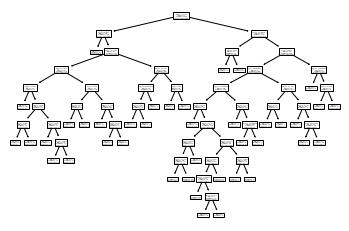

In [221]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
tree.plot_tree(clf)

#### Import classification report and confusion matrix to evaluate predictions
Print out classification report and confusion matrix

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.05      0.08      1440
           1       0.34      0.76      0.47       915

    accuracy                           0.33      2355
   macro avg       0.29      0.41      0.28      2355
weighted avg       0.28      0.33      0.23      2355



# using reddit sentiment data

the goal is to now see if there is any improvement that the reddit sentiment data can provide in improving the accuracy of classification.

In [223]:
# load the data, now with the reddit sentiment columns
X = gme_data[['Open','High','Low', 'Volume', 'Close', 'Adj Close', 'ADX', 'RSI', 'SMA', 'LMA', 'Score']]
y = gme_data['up']

In [224]:
X_train = X[:split_point]
y_train = y[:split_point]

X_test = X[split_point:]
y_test = y[split_point:]

In [225]:
X_train

,Open,High,Low,Volume,Close,Adj Close,ADX,RSI,SMA,LMA,Score
0,49.770000,51.189999,44.560001,9186800.0,45.939999,45.939999,26.642816,45.962590,110.887913,78.886475,-0.173827
1,49.752222,51.157777,44.505695,9186800.0,45.867082,45.867082,26.625878,45.953698,110.590784,78.899723,-0.173827
2,49.734445,51.125555,44.451390,9186800.0,45.794166,45.794166,26.608974,45.944800,110.295705,78.912937,-0.173827
3,49.716667,51.093332,44.397084,9186800.0,45.721249,45.721249,26.592103,45.935898,110.002673,78.926115,-0.173827
4,49.698889,51.061110,44.342779,9186800.0,45.648332,45.648332,26.575264,45.926990,109.711690,78.939260,-0.173827
...,...,...,...,...,...,...,...,...,...,...,...
5488,265.555556,295.924445,260.933331,6051500.0,284.452230,284.452230,31.678100,67.455663,221.165645,190.247576,0.020005
5489,266.027778,296.794723,261.291664,6051500.0,284.729869,284.729869,31.712994,67.495703,221.268933,190.307464,0.020005
5490,266.500000,297.665001,261.649998,6051500.0,285.007508,285.007508,31.748024,67.535685,221.372494,190.367367,0.020005
5491,266.972222,298.535279,262.008331,6051500.0,285.285146,285.285146,31.783188,67.575608,221.476330,190.427284,0.020005


In [226]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Accuracy = metrics.accuracy_score(y_pred, y_pred)*100
classifier = Lasso(alpha=0.1)

In [227]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
Grid = GridSearchCV(clf,{'penalty':['12']},cv=5)
Cross_Validation = cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)

In [228]:
print(Cross_Validation)

[-0.53883727 -0.68130484 -0.5740299  -0.10994311 -0.15727637]


In [229]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
# tree.plot_tree(clf)

In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.25      0.34      1440
           1       0.37      0.68      0.48       915

    accuracy                           0.42      2355
   macro avg       0.46      0.47      0.41      2355
weighted avg       0.48      0.42      0.40      2355



In [231]:
gme_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,LMA,ADX,up,Score,Sentiment,sentiment
0,2021-02-17,49.770000,51.189999,44.560001,45.939999,45.939999,9186800.0,45.962590,110.887913,78.886475,26.642816,0,-0.173827,-1,positive
1,2021-02-17,49.752222,51.157777,44.505695,45.867082,45.867082,9186800.0,45.953698,110.590784,78.899723,26.625878,0,-0.173827,-1,positive
2,2021-02-17,49.734445,51.125555,44.451390,45.794166,45.794166,9186800.0,45.944800,110.295705,78.912937,26.608974,0,-0.173827,-1,positive
3,2021-02-17,49.716667,51.093332,44.397084,45.721249,45.721249,9186800.0,45.935898,110.002673,78.926115,26.592103,0,-0.173827,-1,positive
4,2021-02-17,49.698889,51.061110,44.342779,45.648332,45.648332,9186800.0,45.926990,109.711690,78.939260,26.575264,0,-0.173827,-1,positive
